# ECGR 5105 Homework 3 Aidan Dattada

In [110]:
# Set up code
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from IPython.display import display

# Import datasets
diabetes = pd.read_csv('https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/diabetes.csv')
diabetes_target = diabetes.pop('Outcome')
cancer = pd.DataFrame(np.concatenate([pd.DataFrame(datasets.load_breast_cancer().data), np.reshape(pd.DataFrame(datasets.load_breast_cancer().target),(569,1))],axis=1))
cancer.columns = np.append(datasets.load_breast_cancer().feature_names ,'label')
cancer_target = cancer.pop('label')

# Data preprocessing, scale all values
diabetes_data = StandardScaler().fit_transform(diabetes)
cancer_data = StandardScaler().fit_transform(cancer)

# Debug
"""
print(diabetes.head())
print(diabetes_data[0])
print(cancer.head())
print(cancer_data[0])
"""

# Training info
iterations = 1500
alpha = 0.01

In [111]:
# Define functions
def gradient_descent(X_train, y_train, X_test, y_test, theta, alpha, iterations):
  # Gradient descent finds minimum of the cost function

  # Initialize a numpy array to hold the value of the cost & accuracy functions
  train_cost_history = np.zeros(iterations)
  test_cost_history = np.zeros(iterations)
  train_accuracy_history = np.zeros(iterations)
  test_accuracy_history = np.zeros(iterations)

  # Compute gradient descent
  for i in range(iterations):
    predictions = X_train.dot(theta)
    errors = np.subtract(predictions, y_train)
    sum_delta = (alpha / len(y_train)) * X_train.transpose().dot(errors)
    theta -= sum_delta

    # Populate history arrays
    train_cost_history[i] = compute_cost(X_train, y_train, theta)
    test_cost_history[i] = compute_cost(X_test, y_test, theta)
    train_accuracy_history[i] = compute_accuracy(X_train, y_train, theta)
    test_accuracy_history[i] = compute_accuracy(X_test, y_test, theta)

  # Return model parameters and cost history
  return theta, train_cost_history, test_cost_history, train_accuracy_history, test_accuracy_history

def compute_cost(X, y, theta):
  # This function computes the value of the cost function

  predictions = X.dot(theta)
  errors = np.subtract(predictions, y)
  sqrErrors = np.square(errors)
  J = 1 / (2 * len(y)) * np.sum(sqrErrors)
  return J

def compute_accuracy(X, y, theta):
  # This function computes the accuracy of the logistic regression model.

  predictions = X.dot(theta)
  predicted_classes = (predictions >= 0.5).astype(int)
  y_true = y.astype(int)
  return accuracy_score(y_true, predicted_classes)

## Problem 1

Problem 1 (40 points)

Using the diabetes dataset, build a logistic regression binary classifier for positive diabetes. Please use 80% and 20% split between training and evaluation (test). Make sure to perform proper scaling and standardization before your training. Draw your training results, including loss and classification accuracy over iterations. Also, report your results, including accuracy, precision, and recall, FI score. At the end, plot the confusion matrix representing your binary classifier.

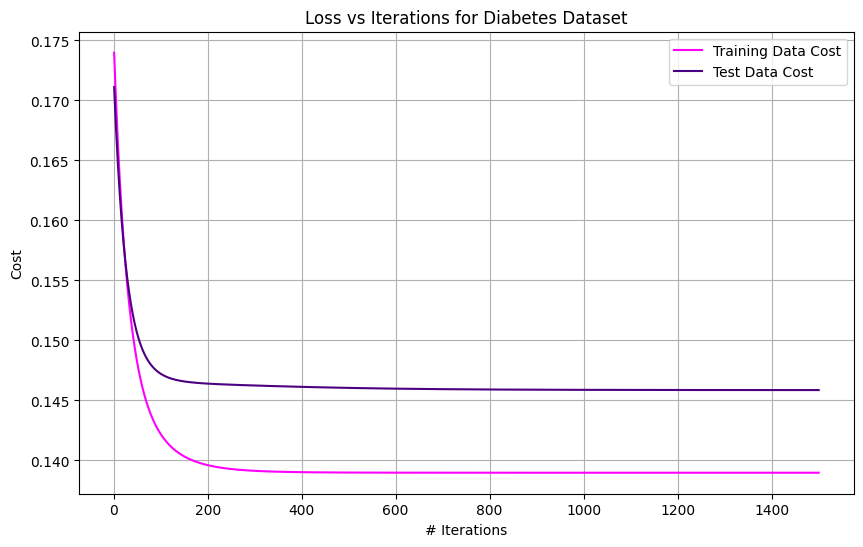

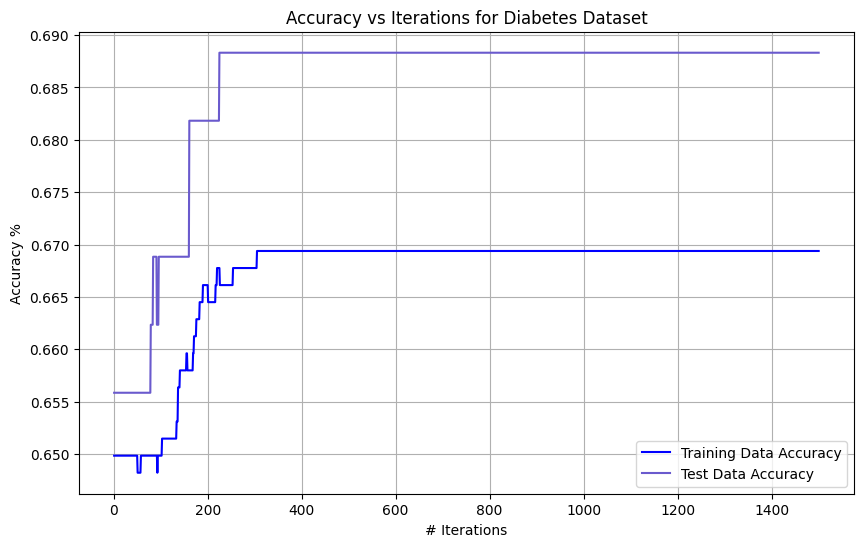

Accuracy -  0.7337662337662337
Precision -  0.6428571428571429
Recall -  0.5094339622641509
F1 -  0.5684210526315789


<Figure size 1000x600 with 0 Axes>

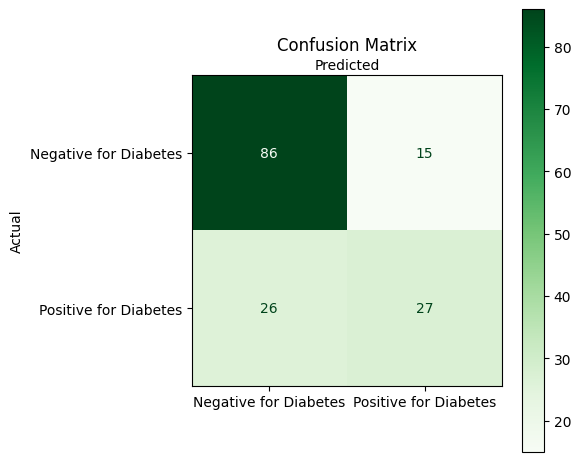

In [112]:
# 80/20 train/test split
np.random.seed(0)
diabetes_data_train, diabetes_data_test = train_test_split(diabetes_data, train_size = 0.8, test_size = 0.2, random_state = 100)
diabetes_target_train, diabetes_target_test = train_test_split(diabetes_target, train_size = 0.8, test_size = 0.2, random_state = 100)

# Train logistic regression model
diabetes_model = LogisticRegression()
diabetes_model.fit(diabetes_data_train, diabetes_target_train)

# Gradient descent
theta = np.zeros(diabetes_data_train.shape[1])
theta, train_cost_history, test_cost_history, train_accuracy_history, test_accuracy_history = gradient_descent(diabetes_data_train, diabetes_target_train, diabetes_data_test, diabetes_target_test, theta, alpha, iterations)

# Cost history plot
plt.clf()
plt.plot(range(1, iterations +1), train_cost_history, color = 'magenta', label = 'Training Data Cost')
plt.plot(range(1, iterations +1), test_cost_history, color = 'indigo', label = 'Test Data Cost')
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('# Iterations')
plt.ylabel('Cost')
plt.title('Loss vs Iterations for Diabetes Dataset')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy history plot
plt.clf()
plt.plot(range(1, iterations +1), train_accuracy_history, color = 'blue', label = 'Training Data Accuracy')
plt.plot(range(1, iterations +1), test_accuracy_history, color = 'slateblue', label = 'Test Data Accuracy')
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('# Iterations')
plt.ylabel('Accuracy %')
plt.title('Accuracy vs Iterations for Diabetes Dataset')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy, precision, recall, F1
predict = diabetes_model.predict(diabetes_data_test)
print("Accuracy - ",metrics.accuracy_score(diabetes_target_test, predict))
print("Precision - ",metrics.precision_score(diabetes_target_test, predict))
print("Recall - ",metrics.recall_score(diabetes_target_test, predict))
print("F1 - ",metrics.f1_score(diabetes_target_test, predict))

# Confusion matrix
plt.clf()
cmatrix = confusion_matrix(diabetes_target_test, predict)
fig, ax = plt.subplots(figsize=(6,5))
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Negative for Diabetes", "Positive for Diabetes"])
plt.yticks(tick_marks, ["Negative for Diabetes", "Positive for Diabetes"])
ax.xaxis.set_label_position("top")
disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=["Negative for Diabetes", "Positive for Diabetes"])
disp.plot(cmap='Greens', ax=ax)
plt.tight_layout()
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Problem 2


Problem 2 (60pts):

a. Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). First, create a logistic regression that takes all 30 input features for classification. Please use 80% and 20% split between training and evaluation (test). Make sure to perform proper scaling and standardization before your training. Draw your training results, including loss and classification accuracy over iterations. Also, report your results, including accuracy, precision, recall and F1 score. At the end, plot the confusion matrix representing your binary classifier.

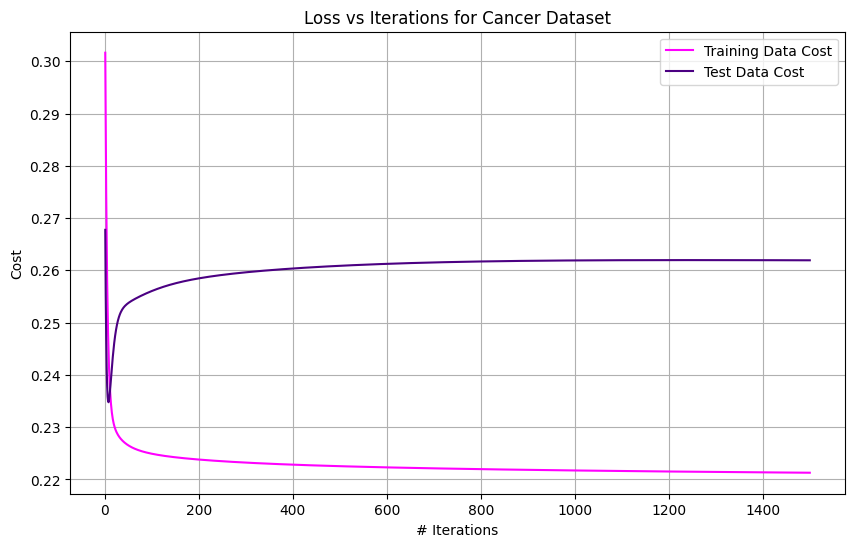

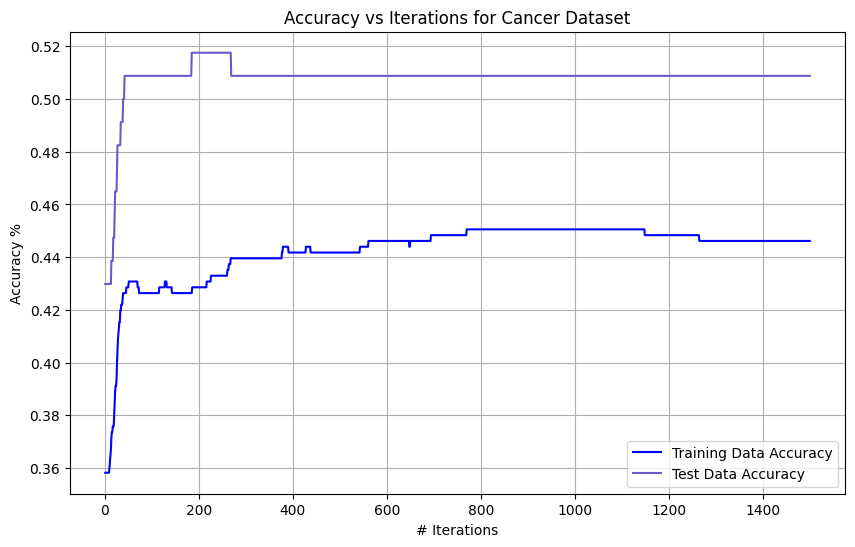

Accuracy -  0.9736842105263158
Precision -  0.9558823529411765
Recall -  1.0
F1 -  0.9774436090225563


<Figure size 1000x600 with 0 Axes>

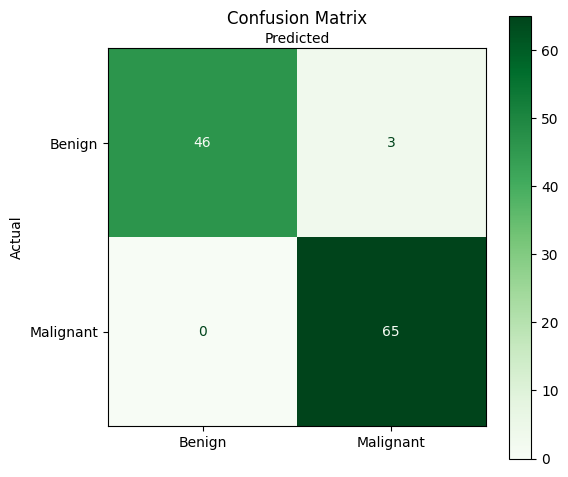

In [113]:
# 80/20 train/test split
np.random.seed(0)
cancer_data_train, cancer_data_test = train_test_split(cancer_data, train_size = 0.8, test_size = 0.2, random_state = 100)
cancer_target_train, cancer_target_test = train_test_split(cancer_target, train_size = 0.8, test_size = 0.2, random_state = 100)

# Train logistic regression model
cancer_model = LogisticRegression()
cancer_model.fit(cancer_data_train, cancer_target_train)

# Gradient descent
theta = np.zeros(cancer_data_train.shape[1])
theta, train_cost_history, test_cost_history, train_accuracy_history, test_accuracy_history = gradient_descent(cancer_data_train, cancer_target_train, cancer_data_test, cancer_target_test, theta, alpha, iterations)

# Cost history plot
plt.clf()
plt.plot(range(1, iterations +1), train_cost_history, color = 'magenta', label = 'Training Data Cost')
plt.plot(range(1, iterations +1), test_cost_history, color = 'indigo', label = 'Test Data Cost')
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('# Iterations')
plt.ylabel('Cost')
plt.title('Loss vs Iterations for Cancer Dataset')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy history plot
plt.clf()
plt.plot(range(1, iterations +1), train_accuracy_history, color = 'blue', label = 'Training Data Accuracy')
plt.plot(range(1, iterations +1), test_accuracy_history, color = 'slateblue', label = 'Test Data Accuracy')
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('# Iterations')
plt.ylabel('Accuracy %')
plt.title('Accuracy vs Iterations for Cancer Dataset')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy, precision, recall, F1
predict = cancer_model.predict(cancer_data_test)
print("Accuracy - ",metrics.accuracy_score(cancer_target_test, predict))
print("Precision - ",metrics.precision_score(cancer_target_test, predict))
print("Recall - ",metrics.recall_score(cancer_target_test, predict))
print("F1 - ",metrics.f1_score(cancer_target_test, predict))

# Confusion matrix
plt.clf()
cmatrix = confusion_matrix(cancer_target_test, predict)
fig, ax = plt.subplots(figsize=(6,5))
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Benign", "Malignant"]) # 0 = benign, 1 = malignant
plt.yticks(tick_marks, ["Benign", "Malignant"])
ax.xaxis.set_label_position("top")
disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=["Benign", "Malignant"])
disp.plot(cmap='Greens', ax=ax)
plt.tight_layout()
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

b.How about adding a weight penalty here, considering the number of parameters. Add the weight penalty and repeat the training and report the results.

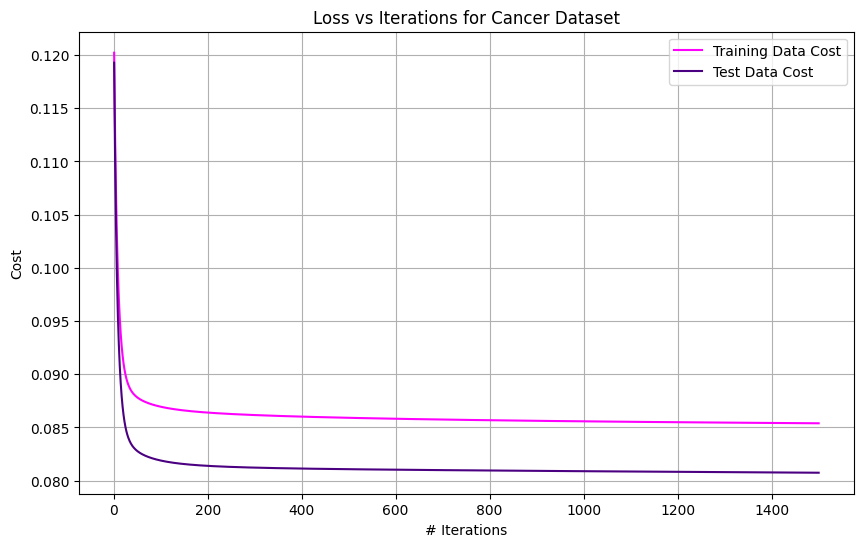

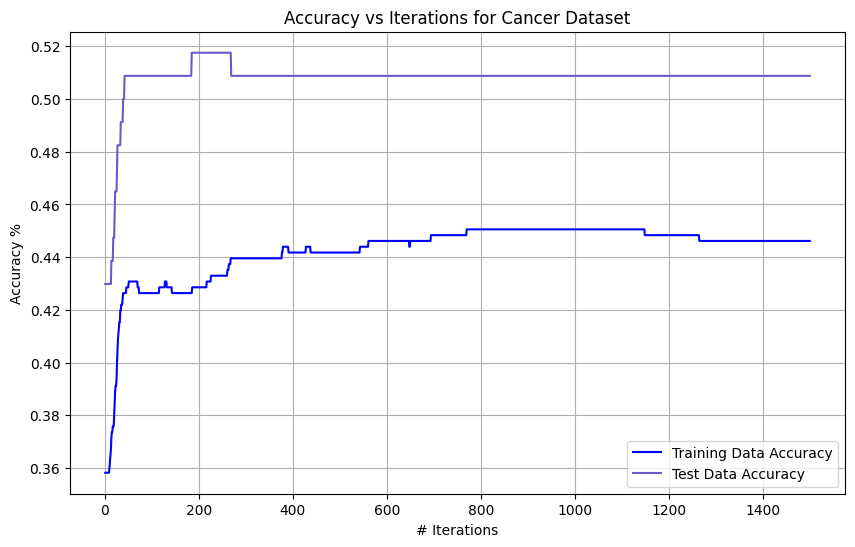

Accuracy -  0.9736842105263158
Precision -  0.9558823529411765
Recall -  1.0
F1 -  0.9774436090225563


<Figure size 1000x600 with 0 Axes>

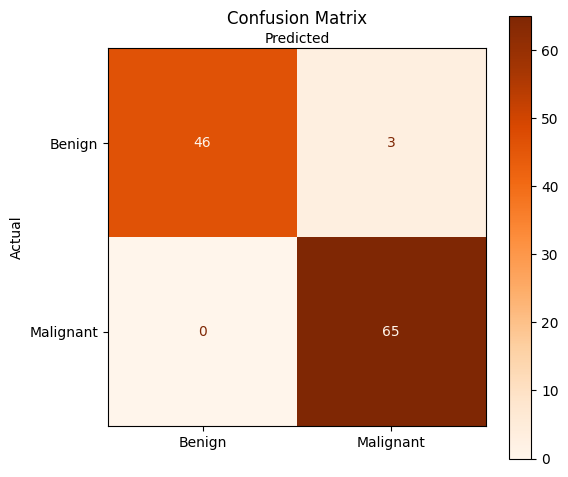

In [120]:
# New function definitions incorporating weight function
def sigmoid_weight(z):
  # This function returns the weighted value of the input

  return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
  # This function returns the value of the loss function

  predictions = sigmoid_weight(X.dot(theta))
  errors = np.subtract(predictions, y)
  sqrErrors = np.square(errors)
  J = 1 / (2 * len(y)) * np.sum(sqrErrors)

  return J

# I don't need to redefine gradient descent because the weight penalty is reflected in the cost function

# Retrain model
cancer_model = LogisticRegression()
cancer_model.fit(cancer_data_train, cancer_target_train)
theta = np.zeros(cancer_data_train.shape[1])
theta, train_cost_history, test_cost_history, train_accuracy_history, test_accuracy_history = gradient_descent(cancer_data_train, cancer_target_train, cancer_data_test, cancer_target_test, theta, alpha, iterations)

# Cost history plot
plt.clf()
plt.plot(range(1, iterations +1), train_cost_history, color = 'magenta', label = 'Training Data Cost')
plt.plot(range(1, iterations +1), test_cost_history, color = 'indigo', label = 'Test Data Cost')
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('# Iterations')
plt.ylabel('Cost')
plt.title('Loss vs Iterations for Cancer Dataset')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy history plot
plt.clf()
plt.plot(range(1, iterations +1), train_accuracy_history, color = 'blue', label = 'Training Data Accuracy')
plt.plot(range(1, iterations +1), test_accuracy_history, color = 'slateblue', label = 'Test Data Accuracy')
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('# Iterations')
plt.ylabel('Accuracy %')
plt.title('Accuracy vs Iterations for Cancer Dataset')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy, precision, recall, F1
predict = cancer_model.predict(cancer_data_test)
print("Accuracy - ",metrics.accuracy_score(cancer_target_test, predict))
print("Precision - ",metrics.precision_score(cancer_target_test, predict))
print("Recall - ",metrics.recall_score(cancer_target_test, predict))
print("F1 - ",metrics.f1_score(cancer_target_test, predict))

# Confusion matrix
plt.clf()
cmatrix = confusion_matrix(cancer_target_test, predict)
fig, ax = plt.subplots(figsize=(6,5))
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Benign", "Malignant"]) # 0 = benign, 1 = malignant
plt.yticks(tick_marks, ["Benign", "Malignant"])
ax.xaxis.set_label_position("top")
disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=["Benign", "Malignant"])
disp.plot(cmap='Oranges', ax=ax)
plt.tight_layout()
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()
